In [ ]:
# load vgg model
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()

553467096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:

# summarize filter shapes
for layer in model.layers:
 # check for convolutional layer
  if 'conv' not in layer.name:
    continue

In [ ]:

# get filter weights
filters, biases = layer.get_weights()
print(layer.name, filters.shape)

predictions (4096, 1000)


In [ ]:
# summarize filters in each convolutional layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [ ]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('/content/drive/MyDrive/Dataset/data_final/train/Liquorice/sample1_10x1_1.jpg',target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1

for _ in range(square):
  for _ in range(square):
    # specify subplot and turn of axis
    ax = f.subplot(square, square, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
    ix += 1
# show the figure

plt.show()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 62ms/step


AttributeError: ignored

<Figure size 1000x1000 with 0 Axes>

1/1 [==============================] - 1s 1s/step


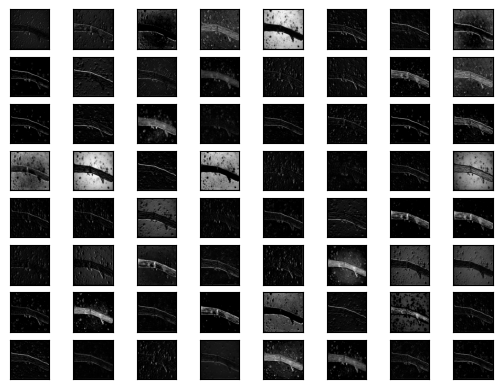

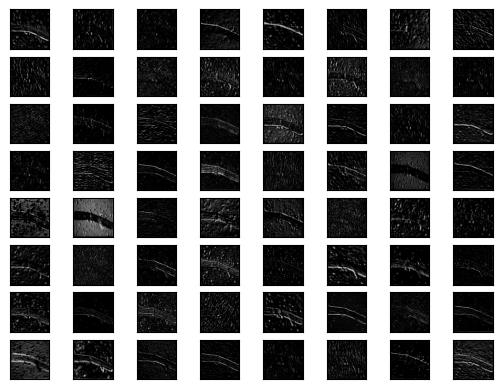

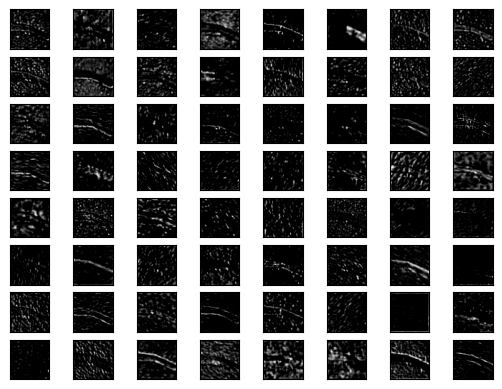

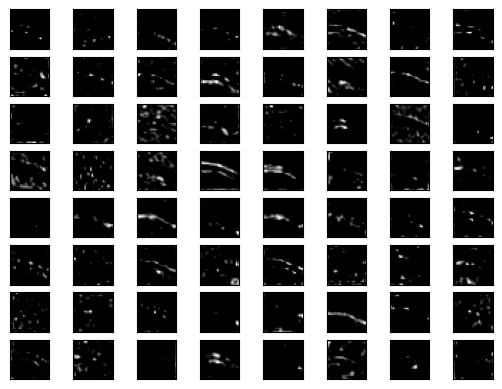

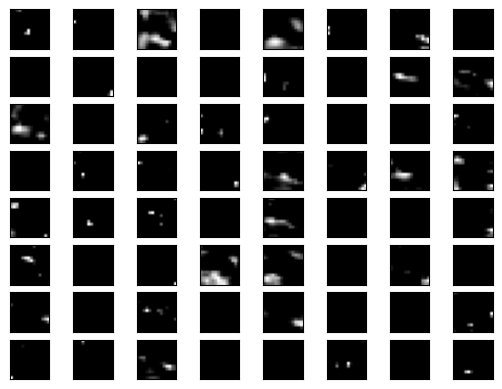

In [ ]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('/content/drive/MyDrive/Dataset/data_final/train/Liquorice/sample1_10x1_1.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
      pyplot.save()
			ix += 1
	# show the figure
	pyplot.show()

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 6.6 MB/s eta 0:00:00


In [ ]:
import visualkeras

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 conv2d_376 (Conv2D)         (None, 149, 149, 32)      864       
                                                                 
Total params: 864
Trainable params: 864
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 66ms/step


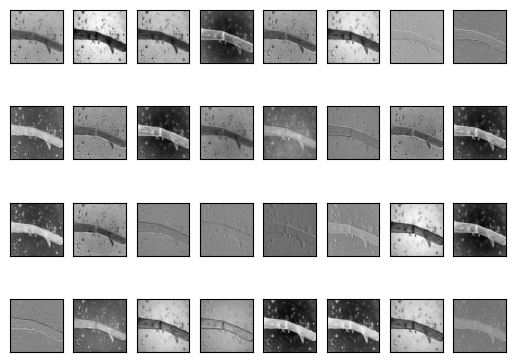

In [ ]:
# inception v3
# plot feature map of first conv layer for given image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
from numpy import expand_dims
# load the model
model = InceptionV3()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('/content/drive/MyDrive/Dataset/data_final/train/Liquorice/sample1_10x1_1.jpg',target_size=(299, 299))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 32 maps
square = 4
ix = 1

for _ in range(square):
  for _ in range(2*square):
    # specify subplot and turn of axis
    ax = plt.subplot(square, 2*square, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
    ix += 1
# show the figure

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
path='/content/drive/MyDrive/Dataset/data_final/test/Liquorice/'
i=1
for filename in os.listdir(path):
  my_dest="Liquorice" + str(i) + ".jpg"
  my_source =path + filename
  my_dest=path + my_dest
  os.rename(my_source, my_dest)
  i += 1

res = os.listdir(path)
print(res)

['Liquorice1.jpg', 'Liquorice2.jpg', 'Liquorice3.jpg', 'Liquorice4.jpg', 'Liquorice5.jpg', 'Liquorice6.jpg', 'Liquorice7.jpg', 'Liquorice8.jpg', 'Liquorice9.jpg', 'Liquorice10.jpg', 'Liquorice11.jpg', 'Liquorice12.jpg', 'Liquorice13.jpg', 'Liquorice14.jpg', 'Liquorice15.jpg', 'Liquorice16.jpg', 'Liquorice17.jpg', 'Liquorice18.jpg', 'Liquorice19.jpg', 'Liquorice20.jpg', 'Liquorice21.jpg', 'Liquorice22.jpg', 'Liquorice23.jpg', 'Liquorice24.jpg', 'Liquorice25.jpg', 'Liquorice26.jpg', 'Liquorice27.jpg', 'Liquorice28.jpg', 'Liquorice29.jpg', 'Liquorice30.jpg', 'Liquorice31.jpg', 'Liquorice32.jpg', 'Liquorice33.jpg']


In [ ]:
import os
path='/content/drive/MyDrive/Dataset/data_final/test/Rhubarb/'
i=1
for filename in os.listdir(path):
  my_dest="Rhubarb" + str(i) + ".jpg"
  my_source =path + filename
  my_dest=path + my_dest
  os.rename(my_source, my_dest)
  i += 1

res = os.listdir(path)
print(res)

['Rhubarb1.jpg', 'Rhubarb2.jpg', 'Rhubarb3.jpg', 'Rhubarb4.jpg', 'Rhubarb5.jpg', 'Rhubarb6.jpg', 'Rhubarb7.jpg', 'Rhubarb8.jpg', 'Rhubarb9.jpg', 'Rhubarb10.jpg', 'Rhubarb11.jpg', 'Rhubarb12.jpg', 'Rhubarb13.jpg', 'Rhubarb14.jpg', 'Rhubarb15.jpg', 'Rhubarb16.jpg', 'Rhubarb17.jpg', 'Rhubarb18.jpg', 'Rhubarb19.jpg', 'Rhubarb20.jpg', 'Rhubarb21.jpg', 'Rhubarb22.jpg', 'Rhubarb23.jpg', 'Rhubarb24.jpg', 'Rhubarb25.jpg', 'Rhubarb26.jpg', 'Rhubarb27.jpg', 'Rhubarb28.jpg', 'Rhubarb29.jpg', 'Rhubarb30.jpg', 'Rhubarb31.jpg', 'Rhubarb32.jpg', 'Rhubarb33.jpg', 'Rhubarb34.jpg', 'Rhubarb35.jpg', 'Rhubarb36.jpg']


In [ ]:
test_data=os.listdir("/content/drive/MyDrive/Dataset/test_final/")
path="/content/drive/MyDrive/Dataset/test_final/"
l=[]
print(test_data)
for image in test_data:
  if(image[0]=="R"):
    l.append(1)
  else:
    l.append(0)

print(l)

['Rhubarb25.jpg', 'Liquorice23.jpg', 'Liquorice20.jpg', 'Liquorice2.jpg', 'Liquorice24.jpg', 'Rhubarb22.jpg', 'Liquorice26.jpg', 'Liquorice27.jpg', 'Liquorice22.jpg', 'Liquorice18.jpg', 'Rhubarb10.jpg', 'Liquorice17.jpg', 'Liquorice13.jpg', 'Liquorice16.jpg', 'Liquorice14.jpg', 'Liquorice15.jpg', 'Liquorice7.jpg', 'Liquorice12.jpg', 'Liquorice11.jpg', 'Liquorice10.jpg', 'Liquorice1.jpg', 'Liquorice6.jpg', 'Rhubarb18.jpg', 'Rhubarb15.jpg', 'Rhubarb34.jpg', 'Rhubarb12.jpg', 'Rhubarb14.jpg', 'Rhubarb13.jpg', 'Rhubarb17.jpg', 'Rhubarb16.jpg', 'Rhubarb11.jpg', 'Rhubarb1.jpg', 'Rhubarb31.jpg', 'Liquorice9.jpg', 'Rhubarb30.jpg', 'Liquorice4.jpg', 'Liquorice5.jpg', 'Liquorice30.jpg', 'Liquorice8.jpg', 'Liquorice29.jpg', 'Liquorice3.jpg', 'Rhubarb28.jpg', 'Liquorice32.jpg', 'Liquorice28.jpg', 'Liquorice33.jpg', 'Rhubarb26.jpg', 'Liquorice31.jpg', 'Liquorice19.jpg', 'Liquorice21.jpg', 'Liquorice25.jpg', 'Rhubarb8.jpg', 'Rhubarb5.jpg', 'Rhubarb6.jpg', 'Rhubarb7.jpg', 'Rhubarb4.jpg', 'Rhubarb36.jp

In [ ]:
from keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/Dataset/model_inception.h5")

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
from numpy import expand_dims
l_pred=[]
for image in test_data:
  img = load_img(os.path.join(path,image), target_size=(760, 1016))
  # convert the image to an array
  img = img_to_array(img)
  # expand dimensions so that it represents a single 'sample'
  img = expand_dims(img, axis=0)
  # prepare the image (e.g. scale pixel values for the inception
  img = preprocess_input(img)
  ans=loaded_model.predict(img)
  pred_img=np.argmax(ans)
  l_pred.append(pred_img)

print(l_pred)

1/1 [==============================] - 3s 3s/step
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(l, l_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Liquorice","Rhubarb"])

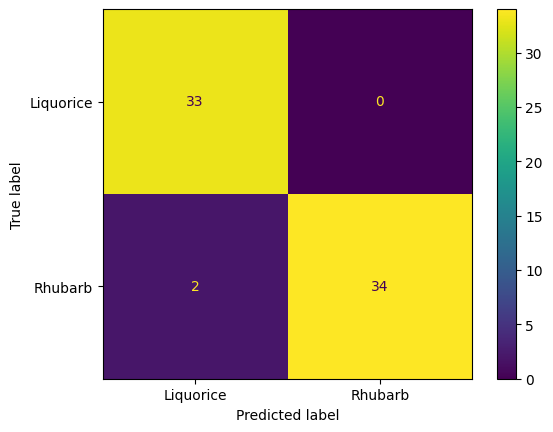

In [ ]:
import matplotlib.pyplot as plt
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report
	
print('Precision: %.3f' % precision_score(l, l_pred))
	
print('Recall: %.3f' % recall_score(l, l_pred))

print('Accuracy: %.3f' % accuracy_score(l, l_pred))

print('F1 Score: %.3f' % f1_score(l, l_pred))

print(classification_report(l, l_pred, target_names=["Liquorice","Rhubarb"]))

Precision: 1.000
Recall: 0.944
Accuracy: 0.971
F1 Score: 0.971
              precision    recall  f1-score   support

   Liquorice       0.94      1.00      0.97        33
     Rhubarb       1.00      0.94      0.97        36

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [ ]:
pred_img

1

In [ ]:
from keras.models import load_model
loaded_model_VGG = load_model("/content/drive/MyDrive/Dataset/model_VGG_final.h5")

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
from numpy import expand_dims
l_pred_VGG=[]
for image in test_data:
  img = load_img(os.path.join(path,image), target_size=(760, 1016))
  # convert the image to an array
  img = img_to_array(img)
  # expand dimensions so that it represents a single 'sample'
  img = expand_dims(img, axis=0)
  # prepare the image (e.g. scale pixel values for the inception
  img = preprocess_input(img)
  ans=loaded_model_VGG.predict(img)
  pred_img=np.argmax(ans)
  l_pred_VGG.append(pred_img)

print(l_pred_VGG)

1/1 [==============================] - 10s 10s/step
[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(l,l_pred_VGG)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Liquorice","Rhubarb"])

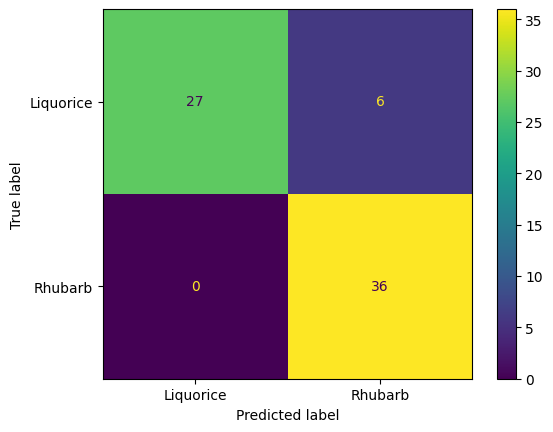

In [ ]:
disp.plot()
plt.show()

In [ ]:
	
print('Precision: %.3f' % precision_score(l, l_pred_VGG))
	
print('Recall: %.3f' % recall_score(l, l_pred_VGG))

print('Accuracy: %.3f' % accuracy_score(l, l_pred_VGG))

print('F1 Score: %.3f' % f1_score(l, l_pred_VGG))

print(classification_report(l, l_pred_VGG, target_names=["Liquorice","Rhubarb"]))

Precision: 0.857
Recall: 1.000
Accuracy: 0.913
F1 Score: 0.923
              precision    recall  f1-score   support

   Liquorice       1.00      0.82      0.90        33
     Rhubarb       0.86      1.00      0.92        36

    accuracy                           0.91        69
   macro avg       0.93      0.91      0.91        69
weighted avg       0.93      0.91      0.91        69

